In [231]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Übungsaufgabe:
### Erstelle einen Entscheidungsbaum, welcher die Inselzugehörigkeit der Pinguine anhand der 4 numerischen Variablen des Datensatzes vorhersagt. Stelle den Baum am Ende graphisch dar. Stutze ihn danach und schaue, ob es das Ergebnis verbessert. Zu guter Letzt versuche das Ganze erneut mit einem RandomForest.

In [232]:
# Load data
pengu = sns.load_dataset("penguins")
pengu

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


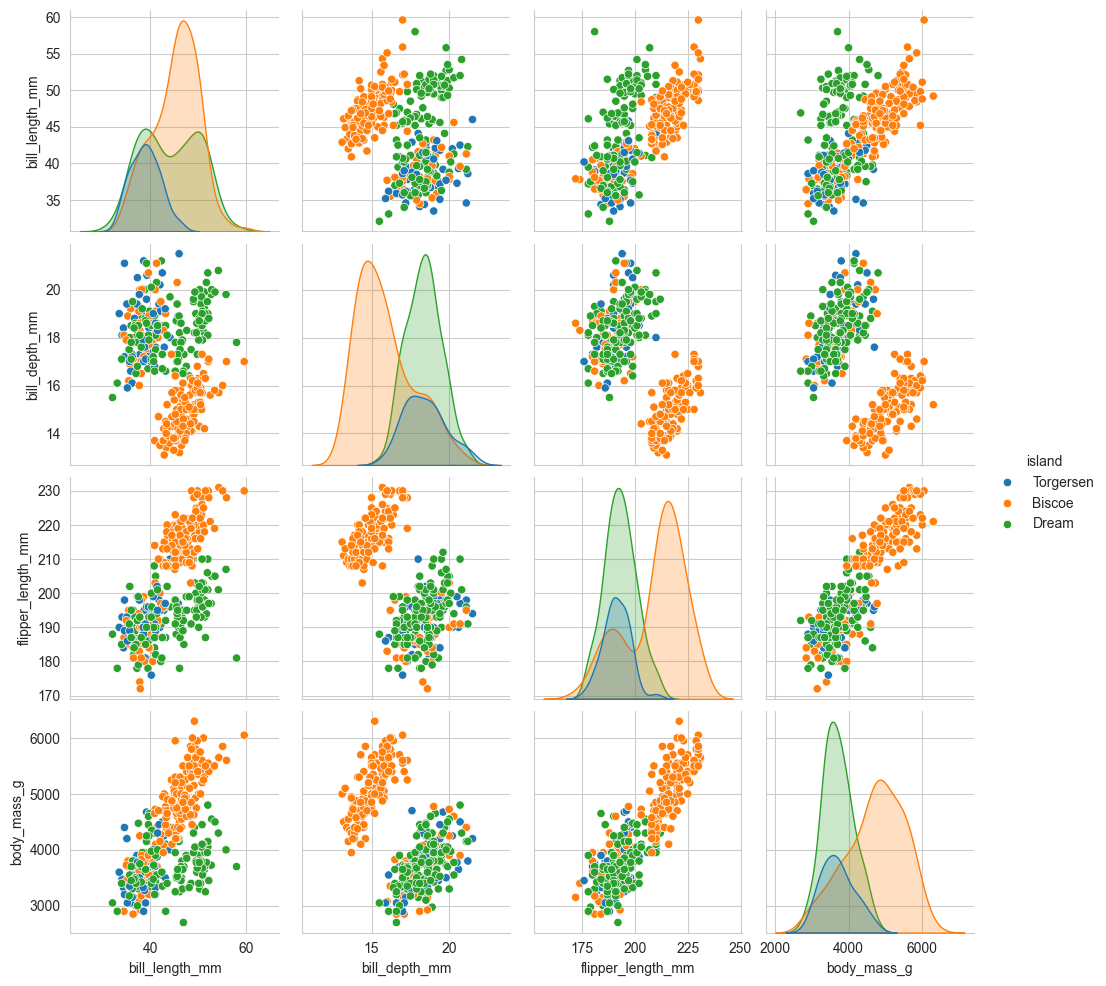

In [233]:
# Pairplot
sns.pairplot(pengu, hue='island')
plt.show()

In [234]:
# NaN's ?
pengu.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [235]:
# Drop NaN's
pengu.dropna(inplace=True)

In [236]:
# NaN's ?
pengu.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [237]:
# Features & Target (X & y)
X = pengu.select_dtypes("number")
y = pengu["island"]

In [238]:
# Features
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [239]:
# Target
y

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 333, dtype: object

In [240]:
# TrainTestSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=42,
													stratify=y
													)

In [241]:
# take a look @ Target
pengu_target = y_train.value_counts()
pengu_target

island
Biscoe       130
Dream         98
Torgersen     38
Name: count, dtype: int64

In [242]:
# take a look @ Target % Distribution
y_train.value_counts(normalize=True)

island
Biscoe       0.488722
Dream        0.368421
Torgersen    0.142857
Name: proportion, dtype: float64

In [243]:
# DecisionTree Model
island_dt = DecisionTreeClassifier(random_state=42)
island_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [244]:
# fitting Model
island_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [245]:
# checking Score
print(f"DecisionTree Train-Score: {island_dt.score(X_train, y_train)}")
print(f"DecisionTree Test-Score: {island_dt.score(X_test, y_test):.3f}")

DecisionTree Train-Score: 1.0
DecisionTree Test-Score: 0.791


In [246]:
# take a look @ Feature-Names
pengu_features = island_dt.feature_names_in_
print(f"🐧 Feature-Names: {pengu_features}")

🐧 Feature-Names: ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'body_mass_g']


In [247]:
# take a look @ Class-Names
pengu_classes = sorted(y_train.unique())
print(f"🐧 Class-Names: {pengu_classes}")

🐧 Class-Names: ['Biscoe', 'Dream', 'Torgersen']


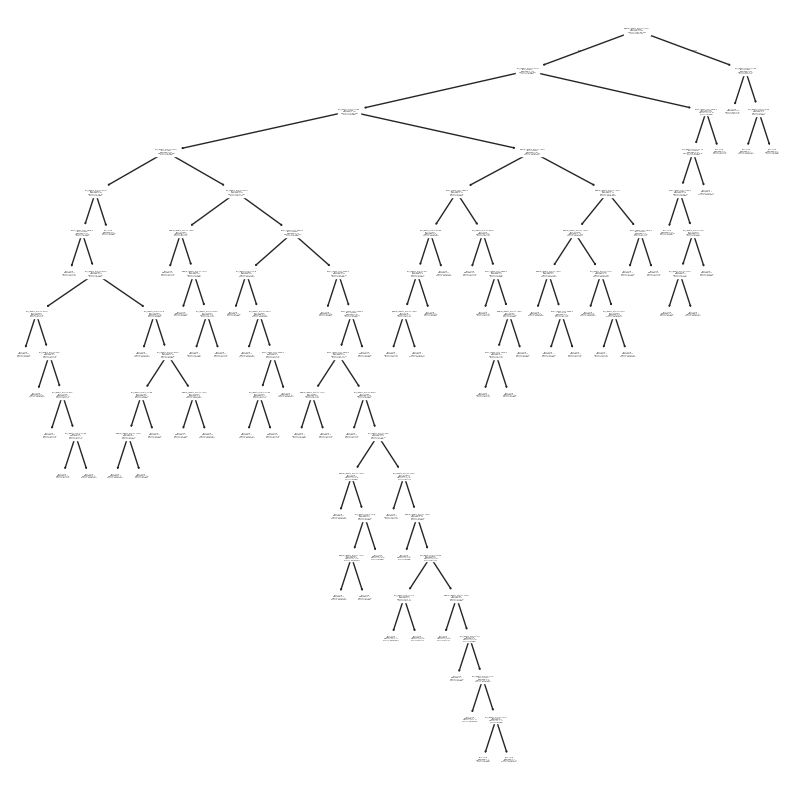

In [248]:
# DecisionTree
plt.figure(figsize=(10, 10))
plot_tree(
	island_dt,
	feature_names=pengu_features,
	class_names=pengu_classes
)

plt.show()

In [249]:
# take a look @ values
print(island_dt.feature_importances_)
print(pengu_features)

[0.27742469 0.14598573 0.44898244 0.12760714]
['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'body_mass_g']


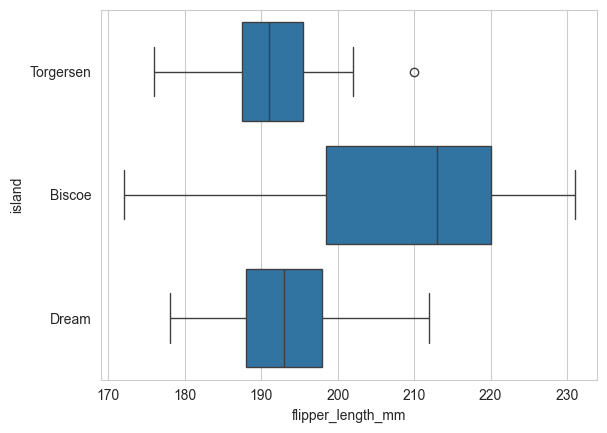

In [250]:
# Boxplot
sns.boxplot(data=pengu, x="flipper_length_mm", y="island")
plt.show()

In [274]:
# Decreasing Max_Depth
model_with_depth = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print(f"Test-Score: {model_with_depth.score(X_test, y_test):.3f}")

Test-Score: 0.791


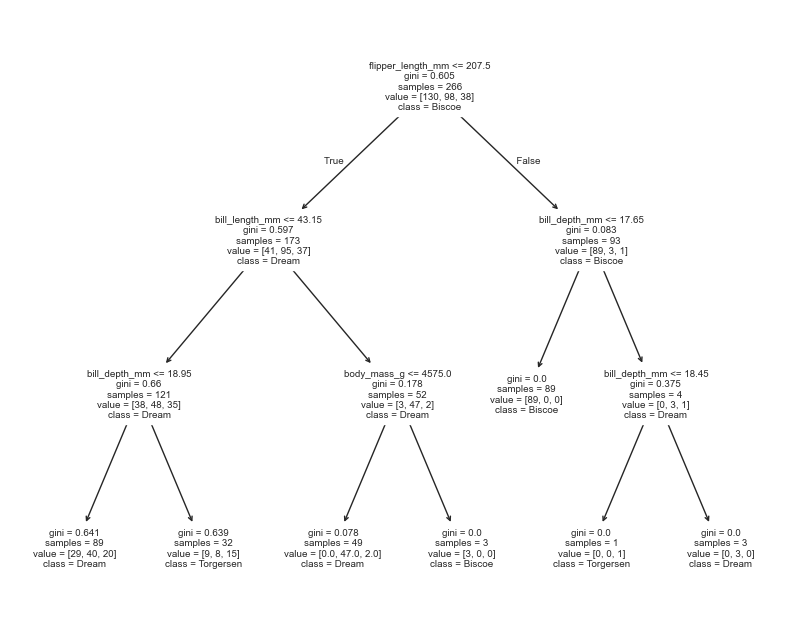

In [275]:
# DecisionTree
plt.figure(figsize=(10, 8))
plot_tree(model_with_depth, feature_names=model_with_depth.feature_names_in_, class_names=pengu_classes)
plt.show()

In [276]:
# take a look @ values
print(model_with_depth.feature_importances_)
print(pengu_features)

[0.17633014 0.12698134 0.62842344 0.06826507]
['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'body_mass_g']


In [277]:
# RandomForest 100
island_rf100 = RandomForestClassifier(random_state=42)
island_rf100.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [278]:
# checking Score
print(f"RandomForest 100 Train-Score: {island_rf100.score(X_train, y_train)}")
print(f"RandomForest 100 Test-Score: {island_rf100.score(X_test, y_test):.3f}")

RandomForest 100 Train-Score: 1.0
RandomForest 100 Test-Score: 0.746


In [279]:
# RandomForest 10
island_rf10 = RandomForestClassifier(n_estimators=10, random_state=42)
island_rf10.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [280]:
# checking Score
print(f"RandomForest 10 Train-Score: {island_rf10.score(X_train, y_train)}")
print(f"RandomForest 10 Test-Score: {island_rf10.score(X_test, y_test):.3f}")

RandomForest 10 Train-Score: 0.9887218045112782
RandomForest 10 Test-Score: 0.746


In [269]:
y_pred = island_rf10.predict(X_test)
y_pred

array(['Biscoe', 'Torgersen', 'Dream', 'Biscoe', 'Dream', 'Dream',
       'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe',
       'Dream', 'Biscoe', 'Torgersen', 'Biscoe', 'Biscoe', 'Torgersen',
       'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Biscoe', 'Biscoe',
       'Biscoe', 'Torgersen', 'Dream', 'Biscoe', 'Dream', 'Torgersen',
       'Dream', 'Dream'], dtype=object)

In [270]:
y_test

264       Biscoe
126    Torgersen
185        Dream
276       Biscoe
120    Torgersen
         ...    
230       Biscoe
180        Dream
109       Biscoe
94         Dream
60        Biscoe
Name: island, Length: 67, dtype: object

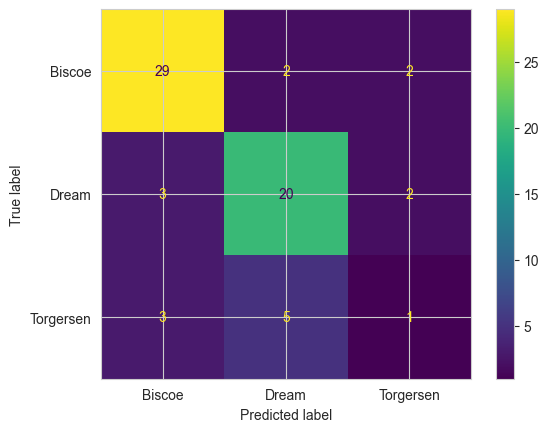

In [271]:
# Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(
	y_true=y_test,
	y_pred=y_pred,
)
plt.show()